In [2]:
import pandas as pd #import pandas
import numpy as np #import numpy
import math #import math
import os #import os
from datetime import datetime #import datetime
import matplotlib.pyplot as plt
import matplotlib.dates

In [1]:
def hasNumbers(inputString): #defines a function testing whether a string has numbers in it
    return any(char.isdigit() for char in inputString) 

In [3]:
os.chdir('C:\\Users\\mmcke\\Desktop\\CS150\\MWRD_Data')
cwd = os.getcwd()  # Name the current working directory cwd
files = os.listdir(cwd) #Makes and names a list of the files in the working directory
#os.getcwd()

'C:\\Users\\mmcke\\Desktop\\CS150\\MWRD_Data'

In [4]:
#this chunk creates a dictionary of each data-containing sheet in the directory
#with keys of the sheet name and values of the sheet as a dataframe
#namesheets creates a list of the names of each sheet.

nameSheets = list() #initializes a list of the names of each sheet
dict_of_dfs = dict()

for filename in files: #iterating over the list of files
    if filename.endswith(".xls"): #it seems that .xls and .xlsx need to be treated differently. 
                                  #Original dataset contains both
        name = pd.ExcelFile(filename) #names the file
        
        for sheet in name.sheet_names: #iterates through each sheet in the file. There is a different and
                                        #unpredictable number of sheets in each file.
            if hasNumbers(sheet) == True and 'RADIO' not in sheet and "Sheet" not in sheet: 
                        #if the sheet has a number in it and does not include the strings "RADIO" or "Sheet",
                        #append sheet name to nameSheets
                nameSheets.append(sheet) #add the sheet to the list of names of sheets
                df = pd.read_excel(name, sheet, header = None) #read the sheet and produce a dataframe df,
                                                               #without a header row
                dict_of_dfs[sheet] = df #create a dictionary entry with sheetname as key and data as value
                    
#makes a list of lists containing the revised first row (headers) of all the sheets and turns it into a dataframe

headerList = list()
subheaderList = list()
for key in dict_of_dfs: #iterates through each sheet
    headers = dict_of_dfs[key].iloc[0] # saves the Series from column 0 as headers
    headerList.append(headers) #appends to headerList
    subheaders = dict_of_dfs[key].iloc[1] # saves the Series from row 1 as subheaders
    subheaderList.append(subheaders) #appends to subheaderList
headerCheck = pd.DataFrame(headerList) #makes a dataframe headerCheck from headerList (list of lists)
subheaderCheck = pd.DataFrame(subheaderList) #makes a dataframe subheaderCheck from headerList (list of lists)
col0names = headerCheck[0].unique()
col1names = headerCheck[1].unique()
col2names = headerCheck[2].unique()

In [5]:
#col0names

array([nan, ' ', '  ', 'Date', 'Collect    '], dtype=object)

In [6]:
#col1names

array([nan, ' ', 'Location', 'Sampling', 'Time ', 'Time'], dtype=object)

In [7]:
#col2names

array(['1 BOD', 'BOD', 'DO  ', 'Sampling', 'Time '], dtype=object)

In [8]:
pd.set_option("display.max_rows", 216, "display.max_columns", 131) 
#headerCheck

In [9]:
pd.set_option("display.max_rows", 216, "display.max_columns", 131) 
#subheaderCheck

In [10]:
#puts column labels in the same row, reduces multiple names in column 0, 1, and 2 to just Station or Date or Time

for key in dict_of_dfs:
    if type(dict_of_dfs[key].iloc[0,0]) == float:    
        if math.isnan(dict_of_dfs[key].iloc[0,0]):
            dict_of_dfs[key].iloc[0,0] = dict_of_dfs[key].iloc[1,0]
    if dict_of_dfs[key].iloc[0,0] == ' ' or dict_of_dfs[key].iloc[0,0] == '  ':
        dict_of_dfs[key].iloc[0,0] = dict_of_dfs[key].iloc[1,0]
    if dict_of_dfs[key].iloc[0,0] == 'Collect    ':
        dict_of_dfs[key].iloc[0,0] = 'Date'
        
#repeats above, for column 1 (station or time) and column 2 (station, when column 1 is time)
for key in dict_of_dfs: #iterate through each sheet
    if type(dict_of_dfs[key].iloc[0,1]) == float: #all NaNs are floats so this looks for floats
        if math.isnan(dict_of_dfs[key].iloc[0,1]): #checks for NaN
            dict_of_dfs[key].iloc[0,1] = dict_of_dfs[key].iloc[1,1] #copies value below over NaN
    if dict_of_dfs[key].iloc[0,1] == ' ' or dict_of_dfs[key].iloc[0,1] == '  ': #checks for particular blanks, 
                                                                                #identified in col1names
        dict_of_dfs[key].iloc[0,1] = dict_of_dfs[key].iloc[1,1] #copies value below over blank
    if dict_of_dfs[key].iloc[0,1] == 'Sampling' or dict_of_dfs[key].iloc[0,1] == 'Location': #checks for alt labels
        dict_of_dfs[key].iloc[0,1] = 'Station' #replaces with standard label
    if dict_of_dfs[key].iloc[0,1] == 'Time ': #checks for alternate label
        dict_of_dfs[key].iloc[0,1] = 'Time' #replaces with standard label
    if dict_of_dfs[key].iloc[0,2] == 'Sampling': #checks for alternate label
        dict_of_dfs[key].iloc[0,2] = 'Station' #replaces with standard label

In [11]:
#standardizes the names of any column storing chloride data and
#distinguishes between numerical data and quality control notes

#by examination of headercheck (above), I determined that chloride data is stored in columns titled 
#'10 Cl- ', 'Cl', 'Chloride', 'CL', and 'CLx' where x is various numbers of spaces.

#similarly, I determined by examination of subheadercheck that quality control notes were in columns
#indicated by various capitalizations of 'qual code', and that all capitalizations' had 'ode' in common.

headerClList = list()
clSubheadCheck = list()
clHeadCheck = list()
l = list()
m = list()
for key in dict_of_dfs:
    headersCl = dict_of_dfs[key].iloc[0] # saves the Series from col 0 as headers               

    for i in range(len(headersCl)):
        if dict_of_dfs[key].iloc[0,i] == '10 Cl-'\
        or dict_of_dfs[key].iloc[0,i] == 'Cl'\
        or 'CL' in str(dict_of_dfs[key].iloc[0,i])\
        or dict_of_dfs[key].iloc[0,i] == 'Chloride': 
            dict_of_dfs[key].iloc[0,i] = 'Chloride'
            if 'ode' in str(dict_of_dfs[key].iloc[1,i]):           
                dict_of_dfs[key].iloc[0,i] = 'Chloride Qual Code'  
            clSubhead = (dict_of_dfs[key].iloc[1,i])               
            clHead = (dict_of_dfs[key].iloc[0,i])                  
            clSubheadCheck.append(clSubhead)                        
            clHeadCheck.append(clHead)

#Now that the header rows have been sorted out, make them headers again:
for key in dict_of_dfs: #iterate through sheets
    dict_of_dfs[key].columns = dict_of_dfs[key].iloc[0] #assign first row as column headers

In [12]:
#Find the sheets with date formatted as something other than Timestamp or datetime
typelist=list() #makes an empty list, typelist
for key in dict_of_dfs: #iterates through sheets
    x = list() #makes a list x
    x.append(key) #adds the current key to x
    x.append(type(dict_of_dfs[key].iloc[3,0])) #adds the type of this sheet's location 3,0 to list x
    typelist.append(tuple(x)) #turns list x into a tuple and adds the tuple to typelist
typelist

[('WW1970', pandas._libs.tslibs.timestamps.Timestamp),
 ('WW1972', pandas._libs.tslibs.timestamps.Timestamp),
 ('WW1973', pandas._libs.tslibs.timestamps.Timestamp),
 ('WW1974', pandas._libs.tslibs.timestamps.Timestamp),
 ('WW1975', str),
 ('1976', str),
 ('1977', str),
 ('WW78BR', str),
 ('WW79BR', str),
 ('WW80BR', str),
 ('1981', pandas._libs.tslibs.timestamps.Timestamp),
 ('1982', pandas._libs.tslibs.timestamps.Timestamp),
 ('1983', pandas._libs.tslibs.timestamps.Timestamp),
 ('1984', pandas._libs.tslibs.timestamps.Timestamp),
 ('1985', pandas._libs.tslibs.timestamps.Timestamp),
 ('1986', pandas._libs.tslibs.timestamps.Timestamp),
 ('1987', pandas._libs.tslibs.timestamps.Timestamp),
 ('1988', pandas._libs.tslibs.timestamps.Timestamp),
 ('1989', pandas._libs.tslibs.timestamps.Timestamp),
 ('1990', pandas._libs.tslibs.timestamps.Timestamp),
 ('1991', pandas._libs.tslibs.timestamps.Timestamp),
 ('1992', pandas._libs.tslibs.timestamps.Timestamp),
 ('1993', pandas._libs.tslibs.timestamps

In [14]:
#some dates have a month but no day recorded, and this section handles that too.
def fixDateString(sheet):
    for index, s in enumerate(dict_of_dfs[sheet].iloc[:,0]): 
        if type(s) == str and s[3:5] == ' 0':    #checks for a date as string with a month but no day
            s = s[0:3]+s[6:]                     #excises bad date
            if s[0:1] == ' ':                    #checks whether month is written badly
                s = '0' + s[1:]                  #if so, adds 0
            s = datetime.strptime(s, '%m/%y')    #converts to date time in month/year format
        elif type(s) == str and len(s)>5 and s[0:1] == ' ': #if type is string, length greater than month-day, 
                                                            #and badly formatted month
            s = '0' + s[1:]                      #fixes month formatting
            s = datetime.strptime(s, '%m/%d/%y') #converts to date time
        elif type(s) == str and len(s)>5:        #if type is string, length greater than month-day, 
                                                 #and month not formatted badly
            s = datetime.strptime(s, '%m/%d/%y') #converts to date time
        else:                                    #before I added this, the columns were 
                                                 #not maintaining correct row alignment
            s = s                                #it's a mystery
        dict_of_dfs[sheet].iloc[:,0][index] = s  #whatever happened in the last 4 statements, 
                                                 #assign the new value to replace the old s.

In [15]:
#repeat for all sheets with dates as strings. 
fixDateString('WW1975')
fixDateString('1976')
fixDateString('1977')
fixDateString('WW78BR')
fixDateString('WW79BR')
fixDateString('WW80BR')

In [16]:
#this section extracts the date, station, and chloride columns for each sheet and appends them to a single df.
#Then, it drops any row with a NaN in the row, any duplicate row, any row in which the value in the 
#'Station' column is 'Station' (as opposed to a station number), and re-indexes the new dataframe.

singledf = pd.DataFrame()
for key in dict_of_dfs:
    newdf = pd.DataFrame(dict_of_dfs[key][['Date', 'Station', 'Chloride']])
    singledf = pd.concat([singledf,newdf])

singledf = singledf.dropna()
singledf = singledf.drop_duplicates()
singledf = singledf.loc[singledf['Station'] != 'Station', ['Date','Station', 'Chloride']]
singledf = singledf.reset_index()
stationValues = singledf.Station.unique()

In [17]:
#stationValues

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 32, 31, 33, 34, 35, 40, 41, 44, 45, 46, 47, 42, 43, 36, 37,
       38, 39, 61, 49, 55, 50, 51, 52, 53, 54, 56, 57, 58, 60, 59, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 77, 78, 79, 80, 8.4, 48, 73, 74,
       75, 76, 85, 90, 89, 82, 86, 'point ', 'WW_50', 'WW_86', 'WW_54',
       'WW_76', 'WW_58', 'WW_59', 'WW_43', 'WW_34', 'WW_36', 'WW_37',
       'WW_73', 'WW_46', 'WW_74', 'WW_39', 'WW_40', 'WW_75', 'WW_41',
       'WW_42', 'WW_48', 'WW_89', 'WW_80', 'WW_18', 'WW_13', 'WW_12',
       'WW_77', 'WW_78', 'WW_17', 'WW_19', 'WW_20', 'WW_24', 'WW_21',
       'WW_29', 'WW_22', 'WW_63', 'WW_64', 'WW_90', 'WW_23', 'WW_49',
       'WW_55', 'WW_56', 'WW_79', 'WW_52', 'WW_57', 'WW_30', 'WW_31',
       'WW_32', 'WW_35', 'WW_49 ', 'WW_50 ', 'WW_86 ', 'WW_52 ', 'WW_55 ',
       'WW_56 ', 'WW_54 ', 'WW_76 ', 'WW_59 ', 'WW_43 ', 'WW_31 ',
       'WW_32 ', 'WW_34 ', 'WW_36 ', 'WW_37 ', 'WW_73 ', 'WW_46 ',
  

In [18]:
#This section further cleans up the station column of singledf:
#Based on examination of stationValues, this chunk:
#Deletes rows with station string longer than 7 characters 
#Deletes rows where station has no digit
##those two remove everything that isn't an int or of the form 'WW_int' or 'WW_int '
##so then, uses a slice to remove 'WW_" and if it ends with (' ') then slices off the last character.
#The basic structure here is: find offending strings and either slice off offending characters or 
#replace offending string with 'remove', then drop rows with 'remove' (or 'ove', in the case of some rows that
#got replaced with remove and then sliced).

for i in range(0,len(singledf)):
    if type(singledf.iloc[i, 2]) == str and len(singledf.iloc[i, 2]) > 7:
        singledf.iloc[i,2] = 'remove'
    if type(singledf.iloc[i, 2]) == str and hasNumbers(singledf.iloc[i, 2]) == False:
        singledf.iloc[i,2] = 'remove'
    if type(singledf.iloc[i, 2]) == str:
        singledf.iloc[i, 2]=singledf.iloc[i, 2][3:]
    if type(singledf.iloc[i, 2]) == str and singledf.iloc[i, 2].endswith(' ') == True:
        singledf.iloc[i, 2]=singledf.iloc[i, 2][:-1]
    if type(singledf.iloc[i, 2]) != str:
        singledf.iloc[i, 2]=str(singledf.iloc[i, 2])
singledf = singledf.loc[singledf['Station'] != 'remove', ['Date','Station', 'Chloride']]
singledf = singledf.loc[singledf['Station'] != 'ove', ['Date','Station', 'Chloride']]
singledf = singledf.reset_index()
stationValues = singledf.Station.unique()
stationValues

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '32', '31', '33',
       '34', '35', '40', '41', '44', '45', '46', '47', '42', '43', '36',
       '37', '38', '39', '61', '49', '55', '50', '51', '52', '53', '54',
       '56', '57', '58', '60', '59', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '77', '78', '79', '80', '8.4', '48', '73',
       '74', '75', '76', '85', '90', '89', '82', '86', '91', '92', '93',
       '94', '95', '96', '100', '108', '112', '99', '109', '110', '111',
       '105', '104', '103', '102', '101', '97', '106', '107', '113'],
      dtype=object)

In [19]:
#this can be uncommented to produce an Excel file of the new dataframe. 
#However, this file retains data for many stations of unknown (to me) location which were removed when I created the student dataset.
#Station locations can be found in the metadata of the more recent data files.
#singledf.to_excel('MWRD_Chloride_corrected.xlsx')

In [ ]:
#Remaining code plots the data

In [21]:
#matplotlib does not plot datetimes so this creates a new column for plottable dates.
singledf['matplotDate'] = singledf['Date']

In [23]:
#this puts plottable dates in the plottable date column. 
#This section also counts the number of successful entries (k) &
#records failed entries in a list l
k = 1
l = list()
for i in range (0, len(singledf)):
    try:
        singledf.matplotDate[i] = matplotlib.dates.date2num(singledf.Date[i])
        k = k+1
    except AttributeError as err:
        l.append(i) 

C:\Users\mmcke\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
#k

28097

In [25]:
#l

[22443]

In [26]:
#This section excises row with the failed entry and resets the index
singledf = pd.concat([singledf.iloc[:22443], singledf.iloc[22444:]])
singledf = singledf.reset_index()

In [27]:
#This section finds rows with a string entry in the Chloride column, replaces the string with 'remove',
#and excises that row.
for i in range(0, len(singledf)):
    if type(singledf.Chloride[i]) == str:
        singledf.Chloride[i] = 'remove'
singledf = singledf.loc[singledf['Chloride'] != 'remove', ['Date','Station', 'Chloride', 'matplotDate']]

C:\Users\mmcke\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'Chloride (mg/L)')

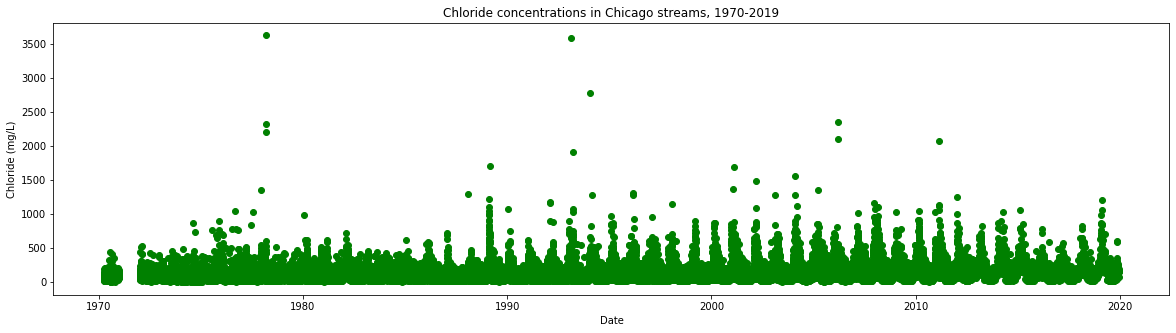

In [28]:
#This section creates a date plot of chloride data (across all stations) from 1970-2019,
#with a modified frame height/width and marker color, and x- and y-axis labels and a title. 
plt.rc('figure', figsize = (20, 5))
fig1, ax = plt.subplots()
ax.plot_date(singledf.matplotDate, singledf.Chloride, xdate = True, color='g')
ax.set_title('Chloride concentrations in Chicago streams, 1970-2019')
ax.set_xlabel('Date')
ax.set_ylabel('Chloride (mg/L)')

In [29]:
#next: subset singledf for each month.
#This section makes two new columns, year, and month, and fills them from the datetime so that
#data can be filtered by month or year.
#it also counts the number of successes (m) and failures (n, from try/except) of this operation.

m = 1
n = 1
singledf['year'] = pd.Series()
singledf['month'] = pd.Series()
for i in range(0, len(singledf)):
    try:
        singledf['year'][i] = singledf.Date[i].year
        m = m+1
        singledf['month'][i] = singledf.Date[i].month
    except KeyError as err:
        n = n+1

C:\Users\mmcke\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\mmcke\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
C:\Users\mmcke\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\mmcke\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

In [30]:
#m

27282

In [31]:
#n

408

In [32]:
#this section creates a new dataframe for each month, containing only data from that month (over all ~50 years)
jan_df = singledf.loc[singledf['month'] == 1, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]
feb_df = singledf.loc[singledf['month'] == 2, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]
mar_df = singledf.loc[singledf['month'] == 3, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]
apr_df = singledf.loc[singledf['month'] == 4, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]
may_df = singledf.loc[singledf['month'] == 5, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]
jun_df = singledf.loc[singledf['month'] == 6, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]
jul_df = singledf.loc[singledf['month'] == 7, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]
aug_df = singledf.loc[singledf['month'] == 8, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]
sep_df = singledf.loc[singledf['month'] == 9, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]
oct_df = singledf.loc[singledf['month'] == 10, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]
nov_df = singledf.loc[singledf['month'] == 11, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]
dec_df = singledf.loc[singledf['month'] == 12, ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]

In [33]:
#this section creates a tuple, monthly_data, with the Chloride data for each month

monthly_data = jan_df['Chloride'], feb_df['Chloride'], mar_df['Chloride'], apr_df['Chloride'],\
may_df['Chloride'], jun_df['Chloride'], jul_df['Chloride'], aug_df['Chloride'], sep_df['Chloride'],\
oct_df['Chloride'], nov_df['Chloride'], dec_df['Chloride']

#list of lists: boxplot still works, violinplot still gives key error
#monthly_data = [jan_df['Chloride'], feb_df['Chloride'], mar_df['Chloride'], apr_df['Chloride'],\
#may_df['Chloride'], jun_df['Chloride'], jul_df['Chloride'], aug_df['Chloride'], sep_df['Chloride'],\
#oct_df['Chloride'], nov_df['Chloride'], dec_df['Chloride']]

#how to make each Series a column in a dataframe? not this way...
#monthly_data = pd.DataFrame([jan_df['Chloride']], [feb_df['Chloride']])
                            #, [mar_df['Chloride']],\
                            #[apr_df['Chloride']], [may_df['Chloride']] 
#[jun_df['Chloride']])
                            #[jul_df['Chloride']], [aug_df['Chloride']], [sep_df['Chloride']],\
                            #[oct_df['Chloride']], [nov_df['Chloride']], [dec_df['Chloride']])

{'whiskers': [<matplotlib.lines.Line2D at 0x21cc69b3748>,
 'caps': [<matplotlib.lines.Line2D at 0x21cc69b3288>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cc99a00c8>,
 'medians': [<matplotlib.lines.Line2D at 0x21cc69ad548>,
 'fliers': [],
 'means': []}

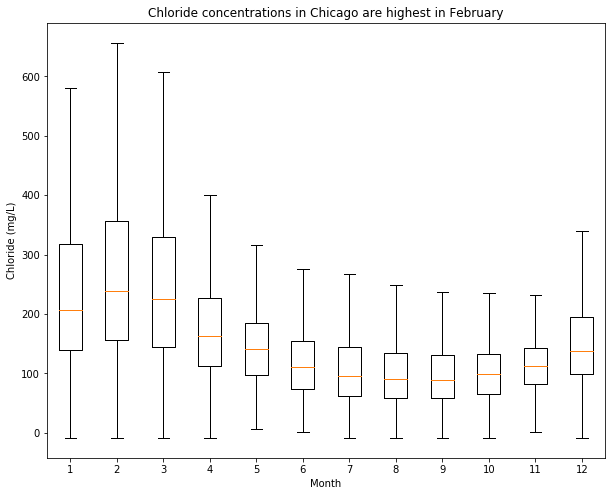

In [34]:
#this section creates a boxplot showing summary statistics for all years, by month, revealing a general trend
#of peak concentrations in Feb and March, and lower concentrations in summer and early fall months.

plt.rc('figure', figsize = (10, 8))
fig2, ax2 = plt.subplots()
ax2.set_title('Chloride concentrations in Chicago are highest in February')
ax2.set_xlabel('Month')
ax2.set_ylabel('Chloride (mg/L)')
ax2.boxplot(monthly_data, showfliers = False)

In [35]:
#this section creates a new dictionary of dataframes for each station
dictByStation = dict()
listOfStations = list(singledf.Station.unique())
for stationNumber in listOfStations:
    dictByStation[stationNumber] = singledf.loc[singledf['Station'] == stationNumber,\
                                 ['Date', 'Station', 'Chloride', 'matplotDate', 'year', 'month']]

In [36]:
#this records the number of years of data recorded at each station, matched to station,
#and sorts from least to most, which I'll use to determine the minimum years of data 
#to require for inclusion in figure 4.
stationObsYears = list()
for key in dictByStation:
    x = len(dictByStation[key].year.unique())
    y = key 
    stationObsYears.append((x,y))
stationObs_df = pd.Series(stationObsYears)
stationObs_df.sort_values()

13      (1, 25)
14      (1, 26)
15      (1, 27)
16      (1, 28)
26      (1, 44)
27      (1, 45)
29      (1, 47)
47      (1, 60)
36      (1, 61)
53      (1, 67)
54      (1, 68)
55      (1, 69)
56      (1, 70)
57      (1, 71)
58      (1, 72)
94     (2, 107)
95     (2, 113)
76      (2, 93)
77      (2, 94)
78      (2, 95)
2       (5, 14)
3       (5, 15)
4       (5, 16)
21      (5, 33)
34      (5, 38)
42      (5, 53)
51      (5, 65)
52      (5, 66)
72      (6, 82)
69      (6, 85)
82     (8, 112)
86     (9, 111)
91    (12, 101)
90    (12, 102)
89    (12, 103)
88    (12, 104)
87    (12, 105)
93    (12, 106)
92     (12, 97)
63    (13, 8.4)
85    (16, 110)
84    (18, 109)
80    (19, 100)
81    (19, 108)
40     (19, 51)
74     (19, 91)
79     (19, 96)
83     (19, 99)
75     (20, 92)
18     (28, 30)
49     (29, 63)
73     (30, 86)
71     (30, 89)
9      (32, 21)
70     (34, 90)
50     (37, 64)
22     (38, 34)
66     (38, 74)
62     (38, 80)
17     (39, 29)
28     (39, 46)
24     (40, 40)
37     (

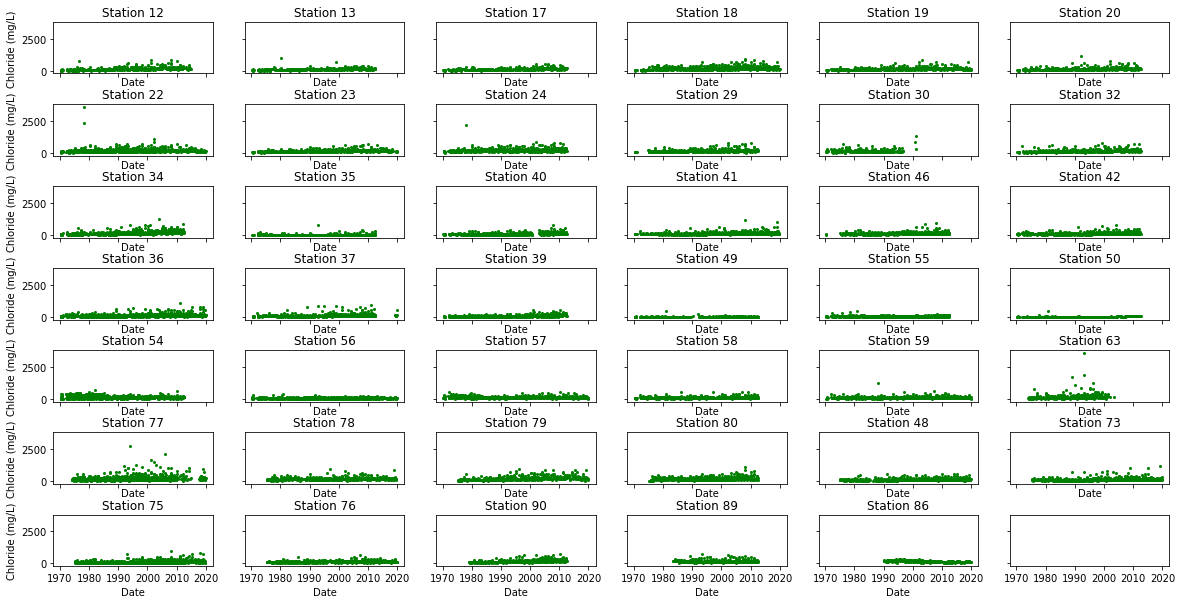

In [37]:
#creates a 7x6 array of plots, with each plot representing the chloride measurements at one station from 1970-2019
#limited to stations with at least 20 years of data
#plot array padding accomodates subplot title indicating station number
#marker size reduced for clarity

plt.rc('figure', figsize = (20, 10))
fig3, ax3 = plt.subplots(7, 6, sharex = True, sharey = True)
plt.subplots_adjust(hspace=0.6)
i = 0
j = 0
for key in dictByStation:
    if len(dictByStation[key].year.unique()) > 20:
        if i < 6:
            ax3[j][i].plot_date(dictByStation[key].matplotDate, dictByStation[key].Chloride, xdate = True,\
                                 color='g', ms=2)
            ax3[j][i].set_title('Station ' + key)
            ax3[j][i].set_xlabel('Date')
            if j ==0 and i ==0:
                ax3[j][i].set_ylabel('Chloride (mg/L)')
            i = i + 1
        else: 
            i = 0
            j = j + 1
            ax3[j][i].plot_date(dictByStation[key].matplotDate, dictByStation[key].Chloride, xdate = True,\
                                 color='g', ms=2)
            ax3[j][i].set_title('Station ' + key)
            ax3[j][i].set_xlabel('Date')
            ax3[j][i].set_ylabel('Chloride (mg/L)')